<center><h1><b> Data Loading </b></h1></center>
This dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset.
**Feature description**:

* price

* The 4 Cs of Diamonds:

* carat (0.2--5.01)

* cut (Fair, Good, Very Good, Premium, Ideal)

* color, from J (worst) to D (best)

* clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* Dimensions

* x length in mm (0--10.74)

* y width in mm (0--58.9)

* z depth in mm (0--31.8)

* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) </br>
The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface).

* table width of the top of the diamond relative to widest point (43--95) </br>
A diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye. The ideal table cut diamond will give the diamond stunning fire and brilliance.

In [73]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random as rd
import scipy.cluster.hierarchy as sch
from matplotlib.pyplot import figure
from scipy.stats import pearsonr, zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

In [74]:
# Data preparation
cwd = os.getcwd()
print(cwd)
os.chdir('C:/Users/User/Downloads/Data_AV/DAV_CA1')
# Reading the data
data = pd.read_csv("diamonds.csv", encoding='latin-1')

# Checking the first 5 rows of the data
data.head()

C:\Users\User\Downloads\Data_AV\DAV_CA1


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<b>The first column is an index ("Unnamed: 0"), so I'm going to remove it later on</b>

In [75]:
# Checking the data shape
data.shape

(53940, 11)

In [76]:
# Checking the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [77]:
# Checking the data table
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<center><h1><b> Data Cleaning </b></h1></center>

### 1. Handling missing values

In [78]:
# Checking the missing values in the data
print("Missing values:")
print(data.isnull().sum())

# Check 0 values in the columns
print("0 values in the columns:")
print(data.eq(0).sum())

Missing values:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64
0 values in the columns:
Unnamed: 0     0
carat          0
cut            0
color          0
clarity        0
depth          0
table          0
price          0
x              8
y              7
z             20
dtype: int64


In [79]:
# Remove the first column as it is not needed
data = data.drop(["Unnamed: 0"], axis=1)

**Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.**

In [80]:
# Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

# Checking the data shape after dropping the dimentionless diamonds
data.shape

(53920, 10)

**Removed 20 data by deleting the dimensionless diamonds.**

In [81]:
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### 2. Outlier detection and removal

In [82]:
# Select only numerical columns for outlier detection
numerical_columns = data.select_dtypes(include=['float64', 'int64'])

# Calculate Z-scores for numerical columns
z_scores = numerical_columns.apply(zscore)

# Define threshold for outlier detection (e.g., |Z| > 3)
outlier_threshold = 3

# Identify rows with outliers in any numerical column
outlier_rows = (z_scores.abs() > outlier_threshold).any(axis=1)

# Remove outlier rows from the dataset
data_no_outliers = data[~outlier_rows]

# Check the shape of the resulting DataFrame
print("Shape of data after removing outliers:", data_no_outliers.shape)

Shape of data after removing outliers: (51586, 10)


### 3. Data Label Encoding

In [83]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_column = list(s[s].index)
print("Categorical attributes:")
print(object_column)

Categorical attributes:
['cut', 'color', 'clarity']


In [84]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each specified column of catergorical data
columns_to_encode = ['cut', 'color', 'clarity']
# Iterate over the columns to encode
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])
    
    # Print the mapping of original string values to encoded integer values
    print(f"Mapping for column '{column}':")
    for i, class_ in enumerate(label_encoder.classes_):
        print(f"'{class_}' --> {i}")

Mapping for column 'cut':
'Fair' --> 0
'Good' --> 1
'Ideal' --> 2
'Premium' --> 3
'Very Good' --> 4
Mapping for column 'color':
'D' --> 0
'E' --> 1
'F' --> 2
'G' --> 3
'H' --> 4
'I' --> 5
'J' --> 6
Mapping for column 'clarity':
'I1' --> 0
'IF' --> 1
'SI1' --> 2
'SI2' --> 3
'VS1' --> 4
'VS2' --> 5
'VVS1' --> 6
'VVS2' --> 7


**color, from J (worst) to D (best)**

**clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))**

In [85]:
# Checking the data types of the columns
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  int32  
 2   color    53920 non-null  int32  
 3   clarity  53920 non-null  int32  
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.9 MB


<center><h1><b> Multivariate Analysis </b></h1></center>

In [86]:
# Checking the data table after cleaning and encoding
print("Number of rows in dataset:", data.shape[0])
print(data.info())
print(data.head())
print(data.describe())

Number of rows in dataset: 53920
<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  int32  
 2   color    53920 non-null  int32  
 3   clarity  53920 non-null  int32  
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.9 MB
None
   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.

### 1. Finding and Checking Correlation and Coefficient 

In [87]:
# Checking the correlation between the predictor and response variables
predictor_variable = ['price']
response_variable = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

# Calculate the Pearson correlation coefficient and p-value
for predictor_var in predictor_variable:
    # Iterate over the response variables
    for response_var in response_variable:
        corr_coef, p_value = pearsonr(data[predictor_var], data[response_var])
        print(f"Pearson correlation coefficient between '{predictor_var}' and '{response_var}': {corr_coef:.2f}")

Pearson correlation coefficient between 'price' and 'carat': 0.92
Pearson correlation coefficient between 'price' and 'cut': 0.04
Pearson correlation coefficient between 'price' and 'color': 0.17
Pearson correlation coefficient between 'price' and 'clarity': -0.07
Pearson correlation coefficient between 'price' and 'depth': -0.01
Pearson correlation coefficient between 'price' and 'table': 0.13
Pearson correlation coefficient between 'price' and 'x': 0.89
Pearson correlation coefficient between 'price' and 'y': 0.87
Pearson correlation coefficient between 'price' and 'z': 0.87


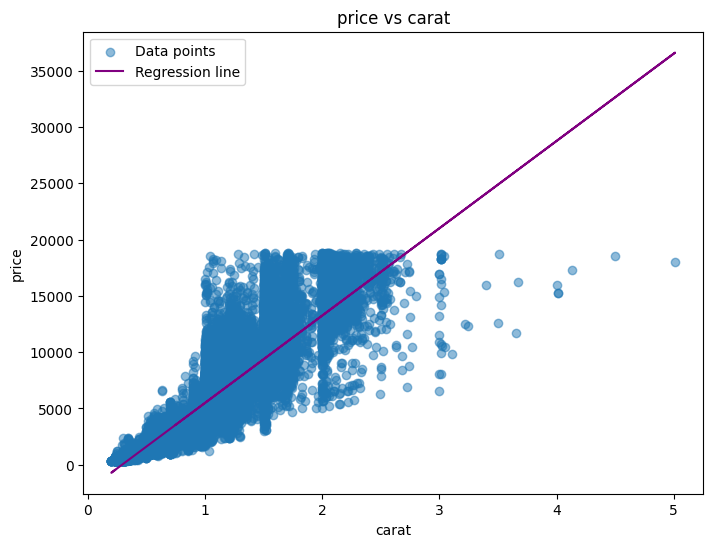

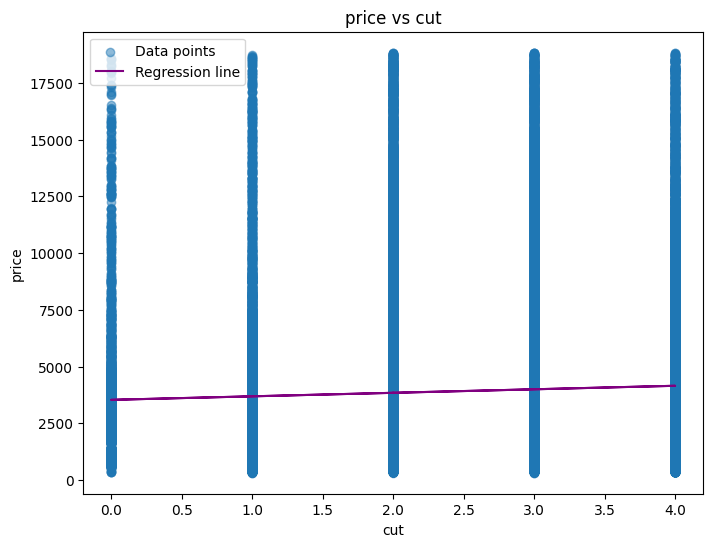

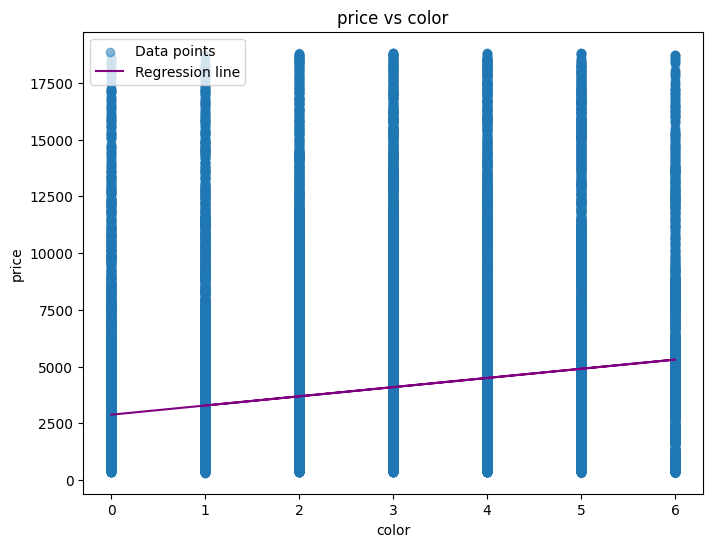

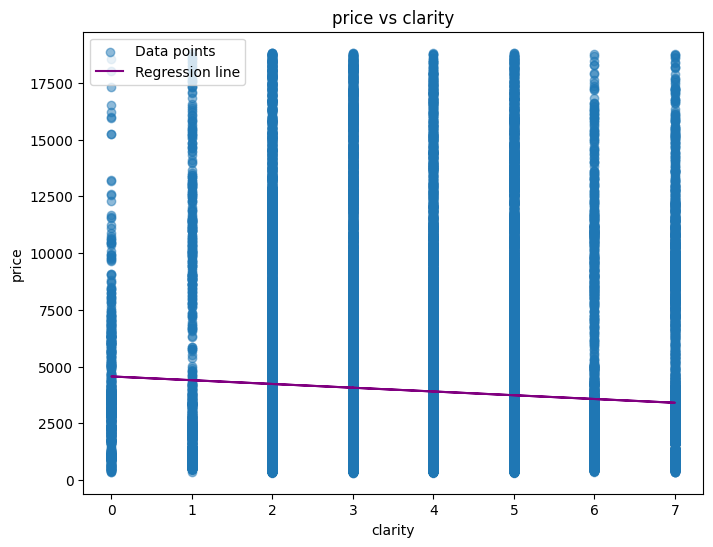

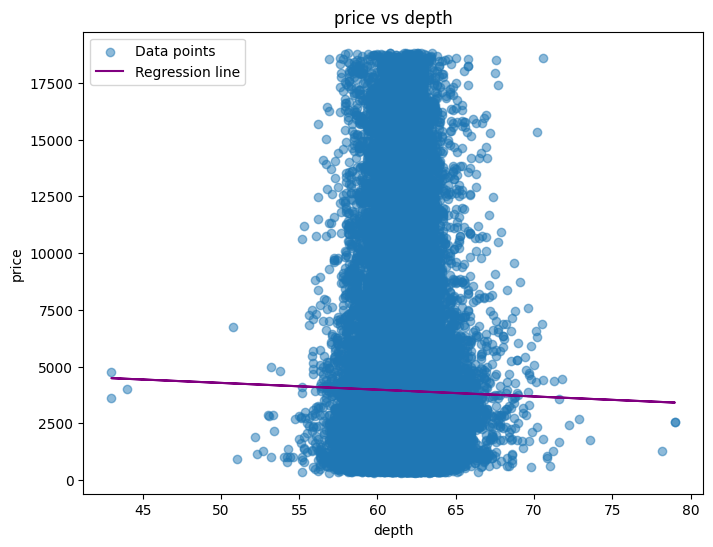

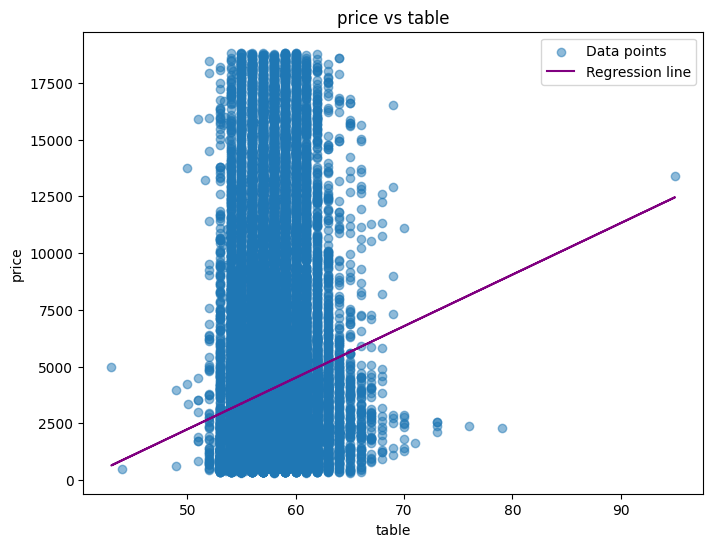

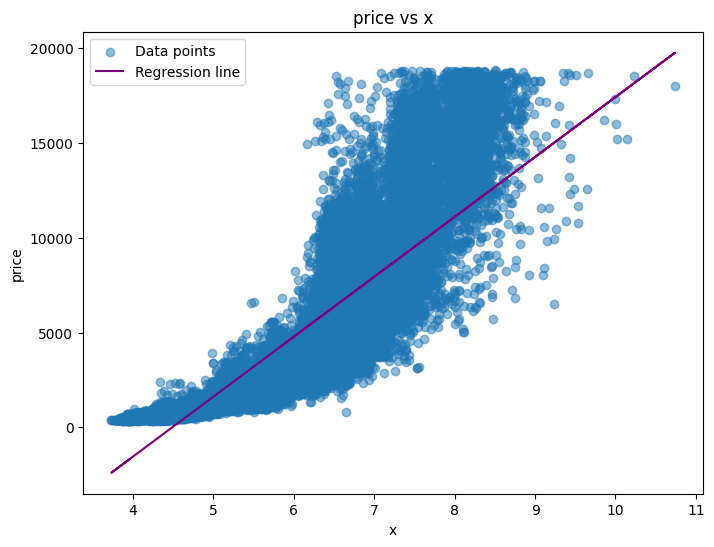

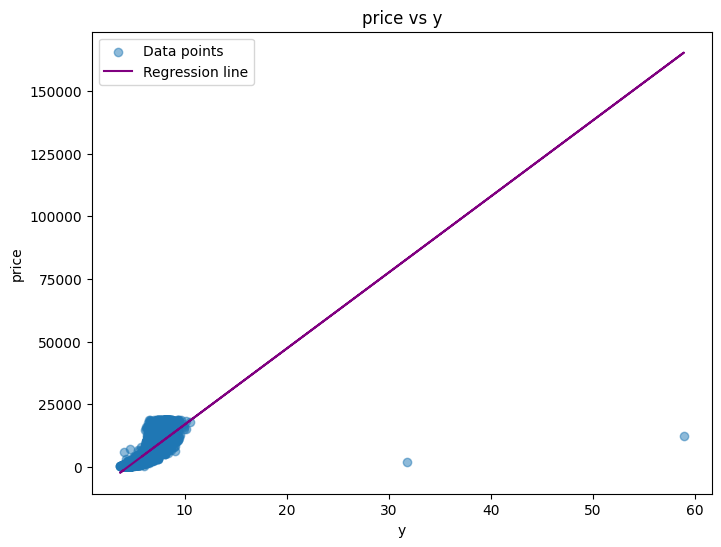

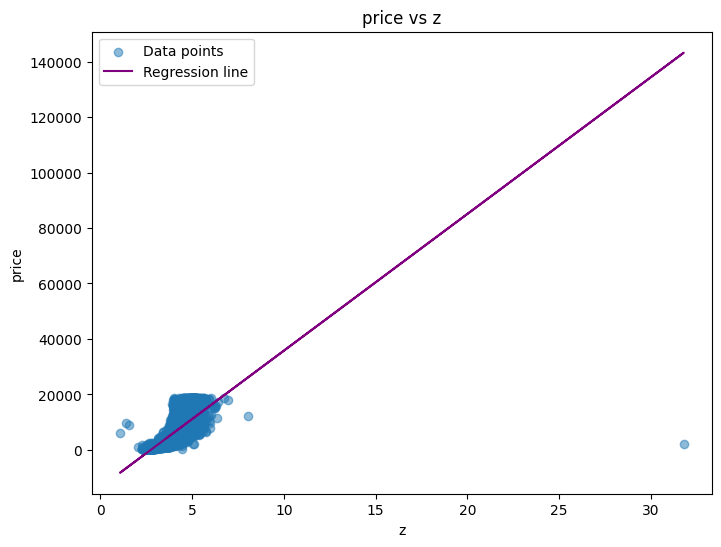

In [88]:
# Visualizing the relationship between the predictor and response variables
for response_var in response_variable:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[response_var], data[predictor_var], alpha=0.5, label='Data points')
    plt.title(f"{predictor_var} vs {response_var}")
    plt.xlabel(response_var)
    plt.ylabel(predictor_var)
    
    # Fit a linear regression line
    m, b = np.polyfit(data[response_var], data[predictor_var], 1)
    plt.plot(data[response_var], m * data[response_var] + b, color='purple', label='Regression line')
    
    # Show the all the data points and the regression line in the plot
    plt.legend()
    plt.show()

In [89]:
# Pairplot of the data to visualize the relationship between the variables further
# ax = sns.pairplot(data, hue='price', palette='inferno')

### 2. Correlation Matrix

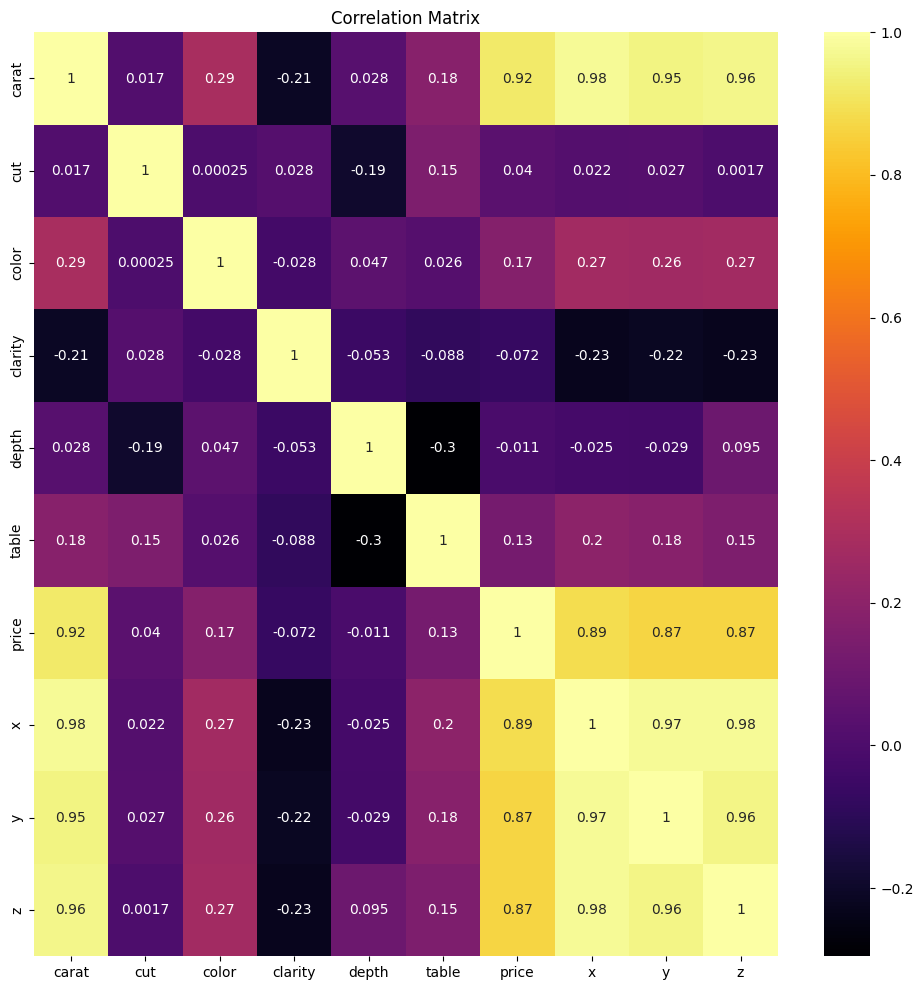

In [90]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, cmap='inferno', annot=True)
plt.title("Correlation Matrix")
plt.show()


**Points to notice:**
* "carat", "x", "y" and "z" show a high correlation. 
* "depth", "cut", "color", "clarity", and "table" show low correlation. I would consider dropping but I will keep it at the moment. 

### 3. Collinearity and Cross-Tabulation

In [91]:
# Investigate collinearity between predictor and response variables (price vs carat)
for predictor_var in predictor_variable:
    unique_predictor = data[predictor_var].unique()

    # Check if there is only one unique value in the predictor variable
    for response_var in response_variable:
        unique_response = data[response_var].unique()

        # Print unique values in predictor and response variables
        print(f"Unique values in '{predictor_var}':", unique_predictor)
        print(f"Unique values in '{response_var}':", unique_response)

        # Check if unique values are identical
        if len(unique_predictor) == 1 and len(unique_response) == 1 and unique_predictor[0] == unique_response[0]:
            print(f"The unique values in '{predictor_var}' and '{response_var}' are identical for all observations.")
        else:
            print(f"The unique values in '{predictor_var}' and '{response_var}' are not identical for all observations.")

Unique values in 'price': [ 326  327  334 ... 2753 2755 2756]
Unique values in 'carat': [0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.

In [92]:
# Cross-Tabulation
for predictor_var in predictor_variable:
    # Create a cross-tabulation between predictor and response variables
    for response_var in response_variable:
        cross_tab = pd.crosstab(data[predictor_var], data[response_var])
        print(f"Cross-Tabulation (Contingency Table) between '{predictor_var}' and '{response_var}':")
        print(cross_tab)
        
        # Determine association between variables
        if cross_tab.shape == (2, 2):
            print("The variables have a perfect association.")
        elif cross_tab.shape[0] == 1 or cross_tab.shape[1] == 1:
            print("The variables have a one-to-one correspondence.")
        else:
            print("The variables may have a strong relationship or potential redundancy.")

Cross-Tabulation (Contingency Table) between 'price' and 'carat':
carat  0.20  0.21  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  ...  3.40  \
price                                                              ...         
326       0     1     0     1     0     0     0     0     0     0  ...     0   
327       0     0     0     1     0     0     0     0     0     0  ...     0   
334       0     0     0     0     0     0     0     0     0     1  ...     0   
335       0     0     0     0     0     0     0     0     0     0  ...     0   
336       0     0     0     0     2     0     0     0     0     0  ...     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
18803     0     0     0     0     0     0     0     0     0     0  ...     0   
18804     0     0     0     0     0     0     0     0     0     0  ...     0   
18806     0     0     0     0     0     0     0     0     0     0  ...     0   
18818     0     0     0     0     0     0     0     0 

**Collinearity:**
* High Correlation among "carat", "x", "y", and "z": This finding suggests that these variables are strongly related to each other, which is expected since carat is a measure of diamond weight and "x", "y", and "z" represent dimensions. This correlation indicates redundancy in the information captured by these variables.
* Low Correlation among "depth", "cut", "color", "clarity", and "table": The low correlation among these variables implies that they are relatively independent of each other. However, this doesn't necessarily mean they are less important for predicting the outcome variable, as they might still hold significant predictive power individually.

**Implication**
* Multicollinearity Concerns: When predictors are highly correlated, it can lead to multicollinearity, a situation where predictors are so interrelated that it becomes challenging to estimate their independent effects on the outcome variable accurately.

**Review**
* The analysis reveals that the unique values in predictor and response are not identical for all observations, indicating that there is no perfect association between them.
* The cross-tabulation table shows the frequency distribution of predictor values for each response value, indicating the distribution of diamond prices across different feature in response variable.

**Conclusion**
* Given the high correlation among "carat", "x", "y", and "z", I will consider dropping some of these variables to simplify the model and mitigate multicollinearity issues. 
* I will retain only "carat" as it directly represents diamond weight, which might be the most influential factor.
* While "depth", "cut", "color", "clarity", and "table" show low correlation with each other, they still may hold predictive power individually. 
* Therefore, it could be beneficial to retain them in the analysis for a more comprehensive understanding of the factors influencing the outcome variable.

<center><h1><b> Regression Modelling </b></h1></center>

### 1. Performing Linear Regression

In [93]:
# Reshape 'carat' data to a 2D array
X = np.array(data['carat']).reshape(-1, 1)
# Extract the target variable 'price'
y = data['price']
# Initialize the Linear Regression model
model = LinearRegression()
# Fit the model with 'carat' as the independent variable and 'price' as the dependent variable
model.fit(X, y)
# Calculate the coefficient of determination (R-squared)
r_sq = model.score(X, y)
# Print the coefficient of determination
print("r_sq value:", r_sq)

r_sq value: 0.8493319314553118


<b>Carat Agaisnt Price</b>

In [94]:
# Add constant term to the predictor variable
X = sm.add_constant(X)
# Initialize the OLS model
model = sm.OLS(y, X)
# Fit the model with 'price' as the independent variable and 'carat' as the dependent variable
result = model.fit()
# Print summary of the regression analysis
print(result.summary())
# Print the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.039e+05
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        20:28:40   Log-Likelihood:            -4.7253e+05
No. Observations:               53920   AIC:                         9.451e+05
Df Residuals:                   53918   BIC:                         9.451e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2255.7688     13.052   -172.828      0.0

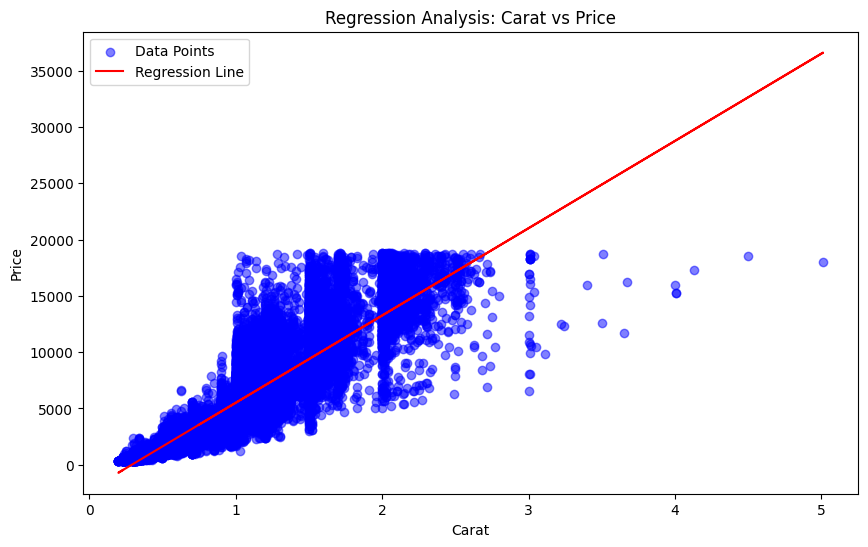

In [141]:
# Add constant to X
X = sm.add_constant(data['carat'])

# Initialize the OLS model
model = sm.OLS(y, X)

# Fit the model
result = model.fit()

# Scatter plot of 'carat' against 'price'
plt.figure(figsize=(10, 6))
plt.scatter(data['carat'], y, color='blue', alpha=0.5, label='Data Points')

# Plot the regression line
plt.plot(data['carat'], result.predict(X), color='red', label='Regression Line')

# Customize plot
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Regression Analysis: Carat vs Price')
plt.legend()

# Show plot
plt.show()

<b>Cut Agaisnt Price</b>

In [138]:
X = sm.add_constant(X)
# Initialize the OLS model
model = sm.OLS(y, data['cut'])
# Fit the model with 'cut' as the independent variable and 'price' as the dependent variable
result = model.fit()
# Print summary of the regression analysis
print(result.summary())
# Print the standard error
print(result.scale**0.5)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.438
Model:                            OLS   Adj. R-squared (uncentered):              0.438
Method:                 Least Squares   F-statistic:                          4.204e+04
Date:                Sun, 05 May 2024   Prob (F-statistic):                        0.00
Time:                        22:36:01   Log-Likelihood:                     -5.2632e+05
No. Observations:               53920   AIC:                                  1.053e+06
Df Residuals:                   53919   BIC:                                  1.053e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

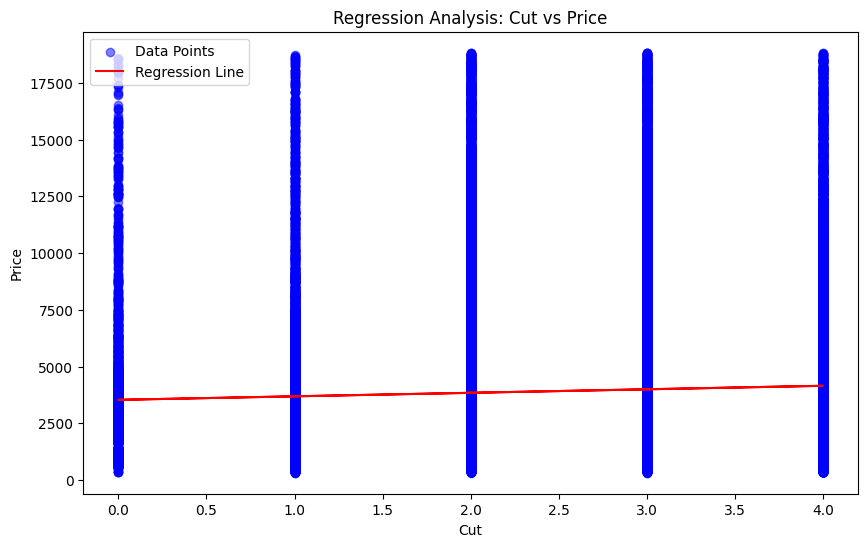

In [140]:
# Add constant to X
X = sm.add_constant(data['cut'])

# Initialize the OLS model
model = sm.OLS(y, X)

# Fit the model
result = model.fit()

# Scatter plot of 'cut' against 'price'
plt.figure(figsize=(10, 6))
plt.scatter(data['cut'], y, color='blue', alpha=0.5, label='Data Points')

# Plot the regression line
plt.plot(data['cut'], result.predict(X), color='red', label='Regression Line')

# Customize plot
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Regression Analysis: Cut vs Price')
plt.legend()

# Show plot
plt.show()

<b>Color Agaisnt Price</b>

In [96]:
X = sm.add_constant(X)
# Initialize the OLS model
model = sm.OLS(y, data['color'])
# Fit the model with 'color' as the independent variable and 'price' as the dependent variable
result = model.fit()
# Print summary of the regression analysis
print(result.summary())
# Print the standard error
print(result.scale**0.5)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.428
Model:                            OLS   Adj. R-squared (uncentered):              0.428
Method:                 Least Squares   F-statistic:                          4.039e+04
Date:                Sun, 05 May 2024   Prob (F-statistic):                        0.00
Time:                        20:28:40   Log-Likelihood:                     -5.2679e+05
No. Observations:               53920   AIC:                                  1.054e+06
Df Residuals:                   53919   BIC:                                  1.054e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

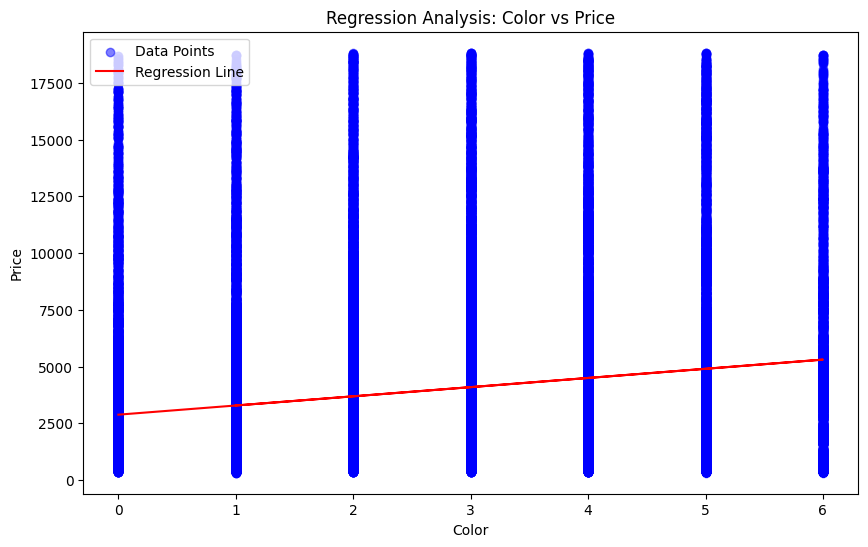

In [143]:
# Add constant to X
X = sm.add_constant(data['color'])

# Initialize the OLS model
model = sm.OLS(y, X)

# Fit the model
result = model.fit()

# Scatter plot of 'color' against 'price'
plt.figure(figsize=(10, 6))
plt.scatter(data['color'], y, color='blue', alpha=0.5, label='Data Points')

# Plot the regression line
plt.plot(data['color'], result.predict(X), color='red', label='Regression Line')

# Customize plot
plt.xlabel('Color')
plt.ylabel('Price')
plt.title('Regression Analysis: Color vs Price')
plt.legend()

# Show plot
plt.show()

<b>Clarity Agaisnt Price</b>

In [97]:
X = sm.add_constant(X)
# Initialize the OLS model
model = sm.OLS(y, data['clarity'])
# Fit the model with 'clarity' as the independent variable and 'price' as the dependent variable
result = model.fit()
# Print summary of the regression analysis
print(result.summary())
# Print the standard error
print(result.scale**0.5)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.384
Model:                            OLS   Adj. R-squared (uncentered):              0.384
Method:                 Least Squares   F-statistic:                          3.357e+04
Date:                Sun, 05 May 2024   Prob (F-statistic):                        0.00
Time:                        20:28:40   Log-Likelihood:                     -5.2881e+05
No. Observations:               53920   AIC:                                  1.058e+06
Df Residuals:                   53919   BIC:                                  1.058e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

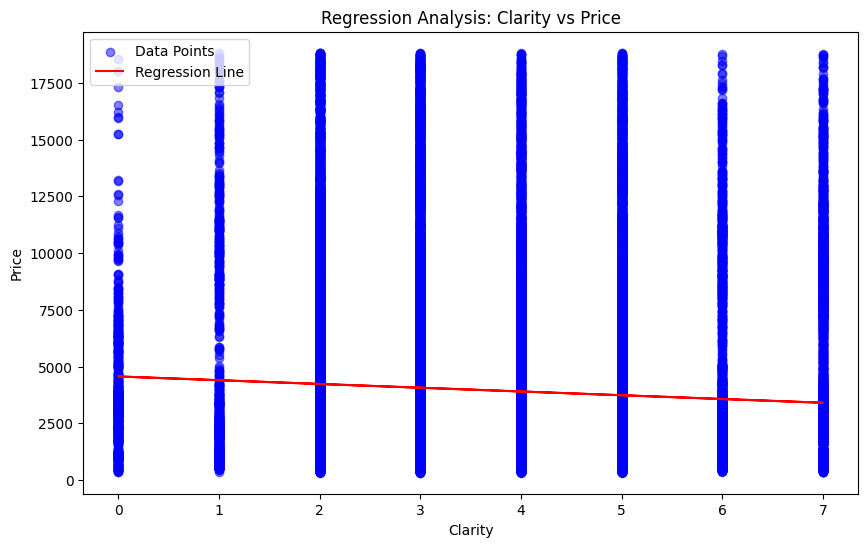

In [148]:
# Add constant to X
X = sm.add_constant(data['clarity'])

# Initialize the OLS model
model = sm.OLS(y, X)

# Fit the model
result = model.fit()

# Scatter plot of 'clarity' against 'price'
plt.figure(figsize=(10, 6))
plt.scatter(data['clarity'], y, color='blue', alpha=0.5, label='Data Points')

# Plot the regression line
plt.plot(data['clarity'], result.predict(X), color='red', label='Regression Line')

# Customize plot
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.title('Regression Analysis: Clarity vs Price')
plt.legend()

# Show plot
plt.show()

<b>Depth Agaisnt Price</b>

In [98]:
X = sm.add_constant(X)
# Initialize the OLS model
model = sm.OLS(y, data['depth'])
# Fit the model with 'depth' as the independent variable and 'price' as the dependent variable
result = model.fit()
# Print summary of the regression analysis
print(result.summary())
# Print the standard error
print(result.scale**0.5)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.492
Model:                            OLS   Adj. R-squared (uncentered):              0.492
Method:                 Least Squares   F-statistic:                          5.230e+04
Date:                Sun, 05 May 2024   Prob (F-statistic):                        0.00
Time:                        20:28:40   Log-Likelihood:                     -5.2358e+05
No. Observations:               53920   AIC:                                  1.047e+06
Df Residuals:                   53919   BIC:                                  1.047e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

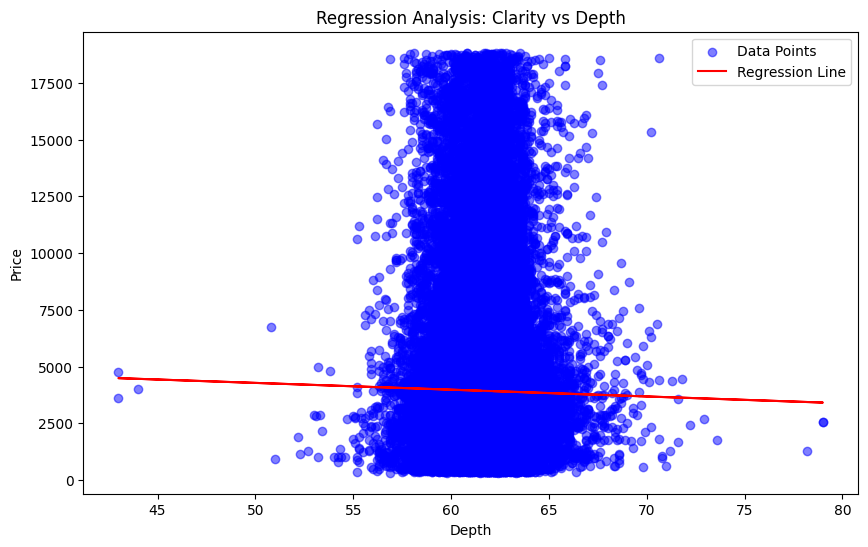

In [149]:
# Add constant to X
X = sm.add_constant(data['depth'])

# Initialize the OLS model
model = sm.OLS(y, X)

# Fit the model
result = model.fit()

# Scatter plot of 'depth' against 'price'
plt.figure(figsize=(10, 6))
plt.scatter(data['depth'], y, color='blue', alpha=0.5, label='Data Points')

# Plot the regression line
plt.plot(data['depth'], result.predict(X), color='red', label='Regression Line')

# Customize plot
plt.xlabel('Depth')
plt.ylabel('Price')
plt.title('Regression Analysis: Clarity vs Depth')
plt.legend()

# Show plot
plt.show()

<b>Table Agaisnt Price</b>

In [99]:
X = sm.add_constant(X)
# Initialize the OLS model
model = sm.OLS(y, data['table'])
# Fit the model with 'table' as the independent variable and 'price' as the dependent variable
result = model.fit()
# Print summary of the regression analysis
print(result.summary())
# Print the standard error
print(result.scale**0.5)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.497
Model:                            OLS   Adj. R-squared (uncentered):              0.497
Method:                 Least Squares   F-statistic:                          5.330e+04
Date:                Sun, 05 May 2024   Prob (F-statistic):                        0.00
Time:                        20:28:40   Log-Likelihood:                     -5.2333e+05
No. Observations:               53920   AIC:                                  1.047e+06
Df Residuals:                   53919   BIC:                                  1.047e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

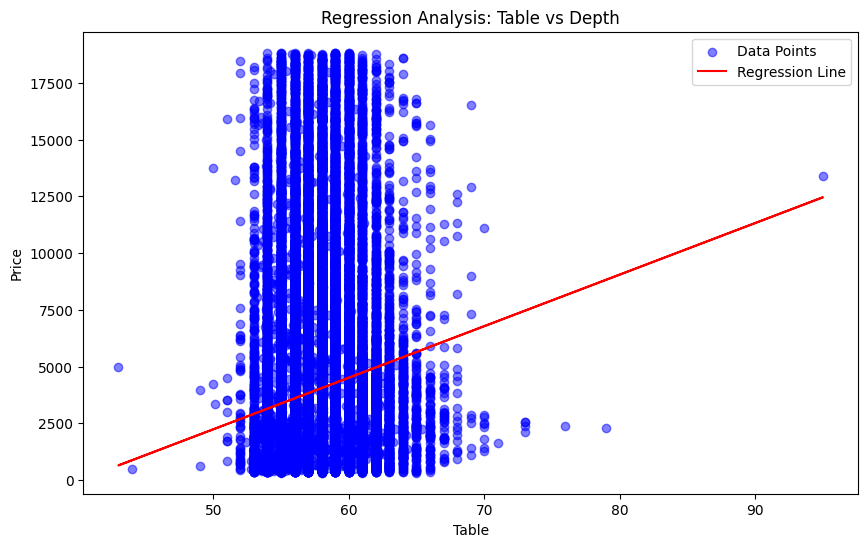

In [150]:
# Add constant to X
X = sm.add_constant(data['table'])

# Initialize the OLS model
model = sm.OLS(y, X)

# Fit the model
result = model.fit()

# Scatter plot of 'table' against 'price'
plt.figure(figsize=(10, 6))
plt.scatter(data['table'], y, color='blue', alpha=0.5, label='Data Points')

# Plot the regression line
plt.plot(data['table'], result.predict(X), color='red', label='Regression Line')

# Customize plot
plt.xlabel('Table')
plt.ylabel('Price')
plt.title('Regression Analysis: Table vs Depth')
plt.legend()

# Show plot
plt.show()

### 2. Principal Components Analysis

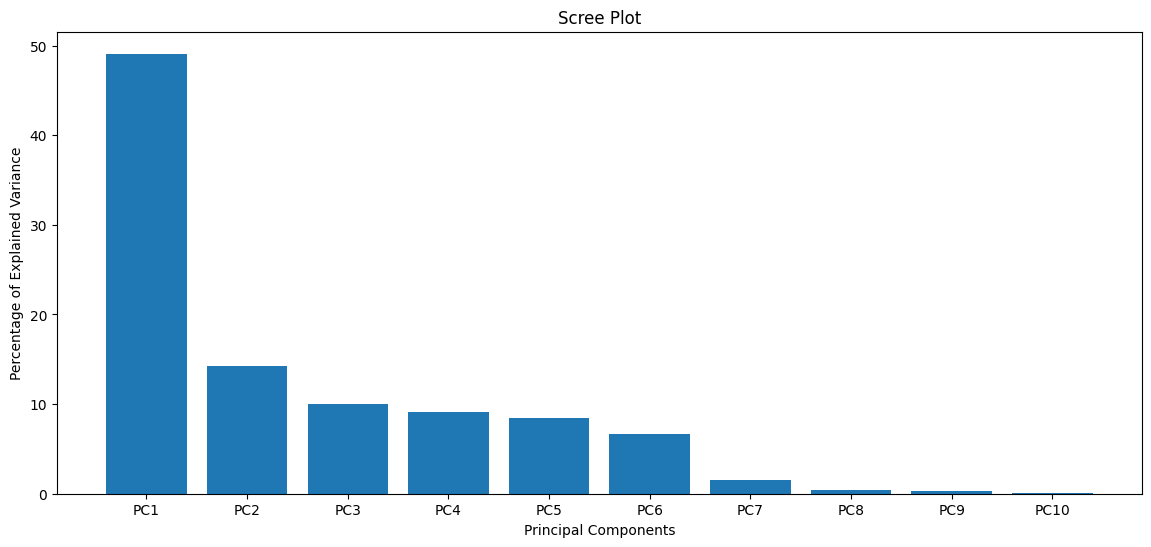

In [100]:
# Select numeric features for PCA
numeric_data = data.select_dtypes(include=[np.number])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# Scree plot
labels = ['PC'+str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title('Scree Plot')
plt.show()

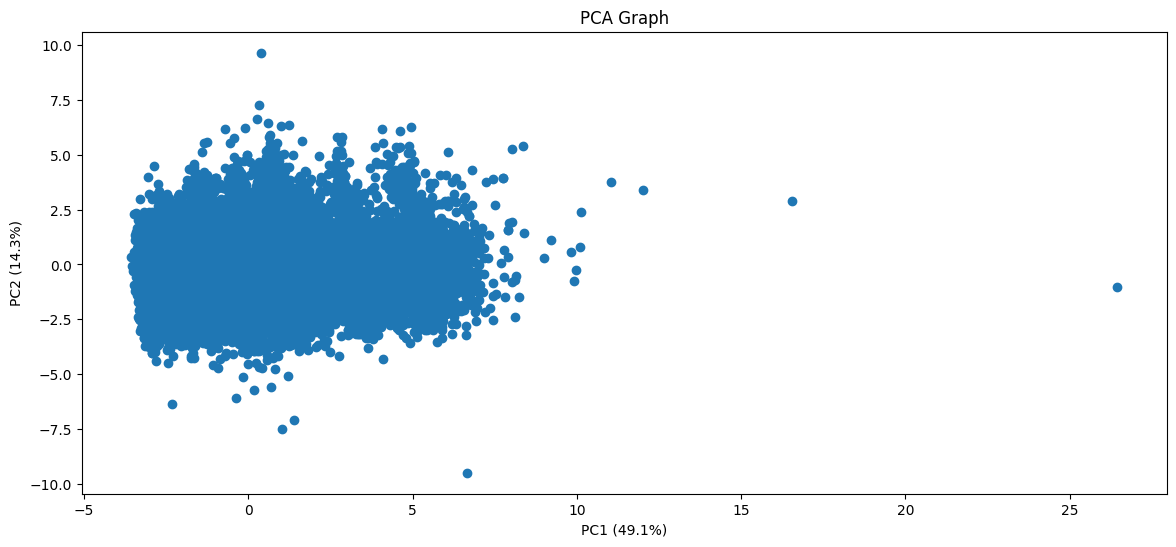

In [101]:
# Transform the scaled data using PCA
pca_data = pca.transform(scaled_data)

# Create a DataFrame for the PCA data
pca_df = pd.DataFrame(pca_data, columns=labels)

# Plot the PCA graph
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA Graph")
plt.xlabel(f'PC1 ({per_var[0]}%)')
plt.ylabel(f'PC2 ({per_var[1]}%)')
plt.show()


In [102]:
# Get loading scores for the first principal component
loading_scores_pc1 = pd.Series(pca.components_[0], index=numeric_data.columns)
loading_scores_pc1 = loading_scores_pc1.drop(['x', 'y', 'z'])

# Display the loading scores for the first principal component
print("Loading scores for PC1:")
print(loading_scores_pc1)

Loading scores for PC1:
carat      0.446074
cut        0.014866
color      0.143935
clarity   -0.110918
depth      0.001740
table      0.098397
price      0.413536
dtype: float64


In [103]:
# Sort the loading scores by absolute values
sorted_loading_scores = loading_scores_pc1.abs().sort_values(ascending=False)

# Get top 10 variables contributing most to the principal component
top_10_variables = sorted_loading_scores.head(10)

# Display the top 10 variables
print("Top 10 variables contributing most to the principal component:")
print(top_10_variables)


Top 10 variables contributing most to the principal component:
carat      0.446074
price      0.413536
color      0.143935
clarity    0.110918
table      0.098397
cut        0.014866
depth      0.001740
dtype: float64


**Based on the loading scores for the first principal component (PC1):**
* The variable with the highest loading score is "carat" (0.446), indicating a strong positive correlation with PC1. This suggests that changes in "carat" have a significant influence on the direction of PC1.
* The variable "price" also has a relatively high loading score (0.414), indicating a positive correlation with PC1. This suggests that variations in "price" are associated with the direction of PC1, although to a slightly lesser extent compared to "carat".
* Other variables such as "color" (0.144) and "table" (0.098) also show positive loading scores, albeit smaller in magnitude, indicating some level of correlation with PC1.
* "clarity" has a negative loading score (-0.111), suggesting a weak negative correlation with PC1. However, the magnitude of this loading score is smaller compared to the positive loading scores of other variables.
* Overall, PC1 seems to be primarily influenced by variations in "carat" and "price", with smaller contributions from "color", "table", and a weak negative contribution from "clarity". The variables "depth" and "cut" have minimal influence on PC1 as indicated by their relatively small loading scores.

<center><h1><b> Normalisation and Standardization </b></h1></center>

In [104]:
# Perform hierarchical clustering
predictor_variable = ['price']
response_variable = ['carat', 'cut', 'color', 'clarity', 'depth', 'table']

### 1. Standardization (Z-score normalization)

In [105]:
# Initialize the StandardScaler for standardization
scaler_standard = StandardScaler()

# Fit and transform the data for standardization
data_standardized = scaler_standard.fit_transform(data[response_variable])

# Convert the standardized data back to a DataFrame
data_standardized = pd.DataFrame(data_standardized, columns=response_variable)

# Display the standardized data
print("Standardized data:")
print(data_standardized.head())

Standardized data:
      carat       cut     color   clarity     depth     table
0 -1.198204 -0.538173 -0.936971 -0.484445 -0.174203 -1.099725
1 -1.240417  0.434877 -0.936971 -1.064312 -1.361090  1.585988
2 -1.198204 -1.511224 -0.936971  0.095422 -3.385781  3.376463
3 -1.071566  0.434877  1.414232  0.675289  0.454149  0.243131
4 -1.029353 -1.511224  2.002033 -0.484445  1.082501  0.243131


### 2. Normalization (Minmax Scaling)

In [106]:
# Initialize the MinMaxScaler for normalization
scaler_minmax = MinMaxScaler()

# Fit and transform the data for normalization
data_normalized = scaler_minmax.fit_transform(data[response_variable])

# Convert the normalized data back to a DataFrame
data_normalized = pd.DataFrame(data_normalized, columns=response_variable)

# Display the normalized data
print("\nNormalized data:")
print(data_normalized.head())


Normalized data:
      carat   cut     color   clarity     depth     table
0  0.006237  0.50  0.166667  0.428571  0.513889  0.230769
1  0.002079  0.75  0.166667  0.285714  0.466667  0.346154
2  0.006237  0.25  0.166667  0.571429  0.386111  0.423077
3  0.018711  0.75  0.833333  0.714286  0.538889  0.288462
4  0.022869  0.25  1.000000  0.428571  0.563889  0.288462


<center><h1><b> Cluster Analysis </b></h1></center>

### 1. Hierarchy Cluster (linkage)
*I only used 1000 datasets as my laptop couldnt handle too much datasets*

C:\Users\User\AppData\Local\Temp\ipykernel_5140\1371144441.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data.dropna(inplace=True)


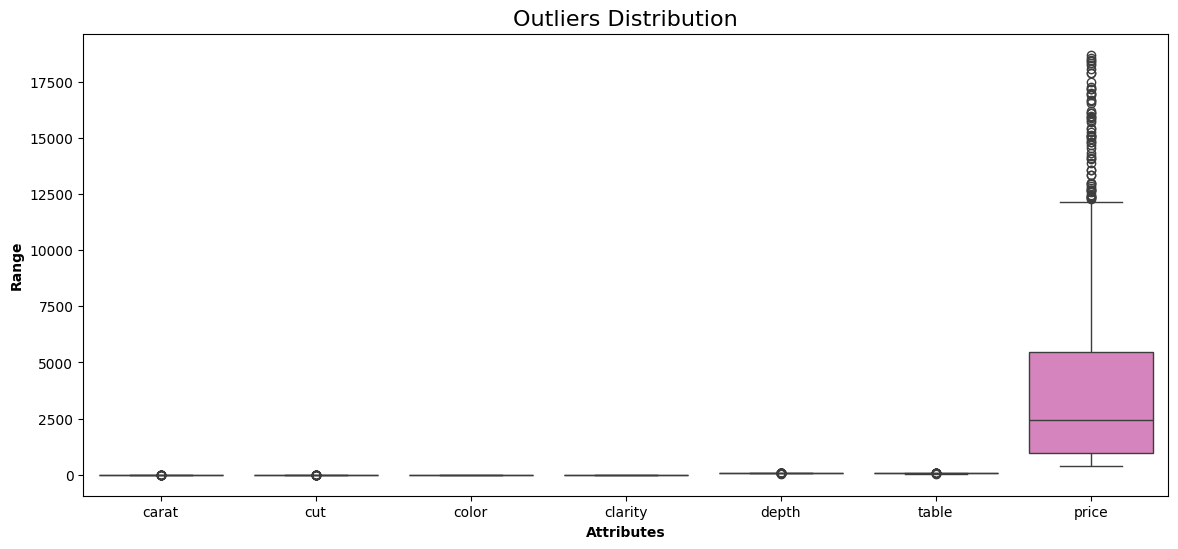

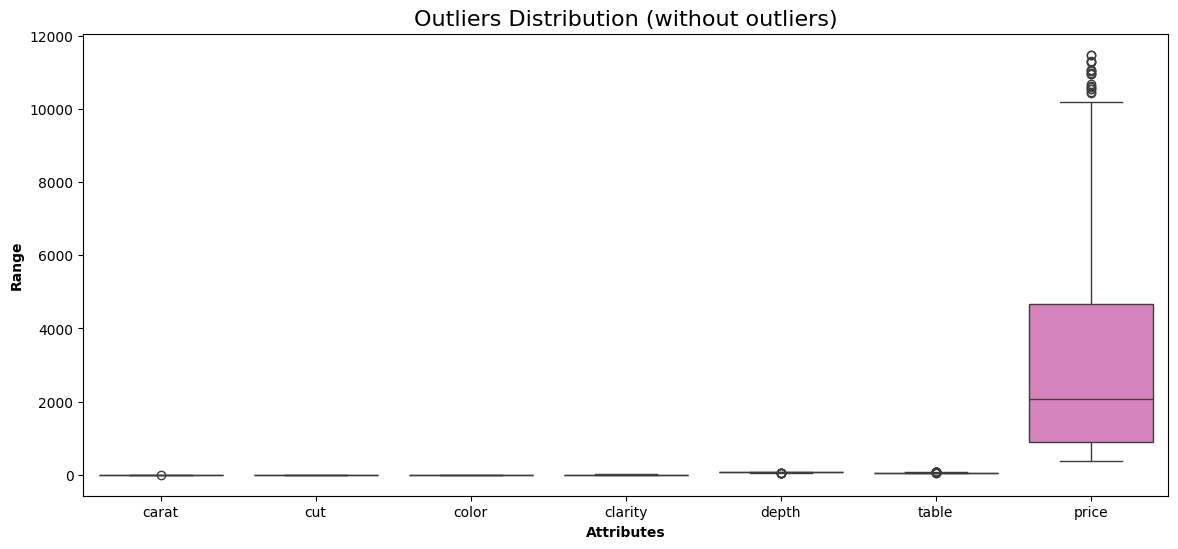

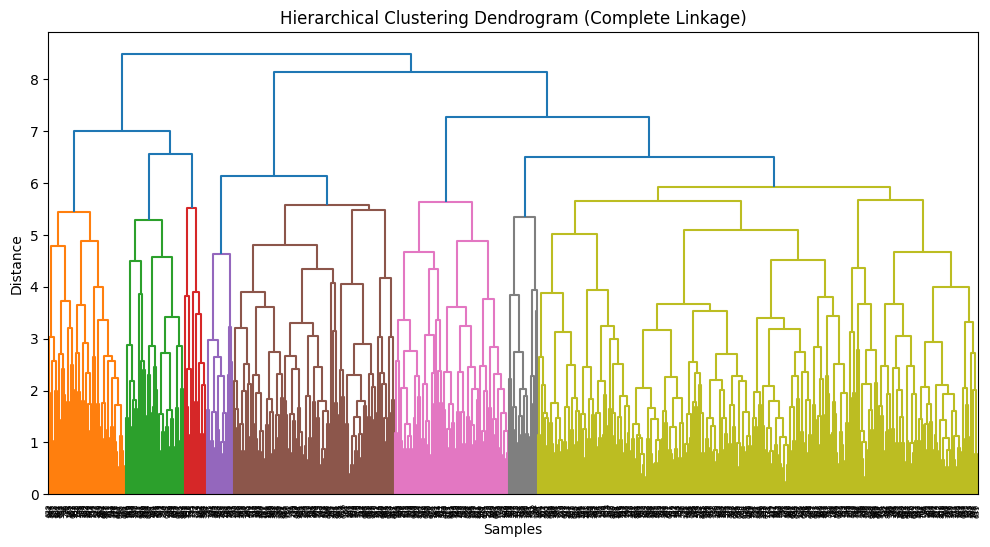

In [107]:
# Select relevant columns
relevant_columns = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price']
cluster_data = data[relevant_columns]

# Drop any rows with missing values
cluster_data.dropna(inplace=True)

# Select only 1000 samples
cluster_data = cluster_data.sample(n=1000, random_state=42)

# Show boxplot before removing outliers
plt.rcParams['figure.figsize'] = [14, 6]
sns.boxplot(data=cluster_data, orient='v')
plt.title("Outliers Distribution", fontsize=16)
plt.ylabel("Range", fontweight='bold')
plt.xlabel("Attributes", fontweight='bold')
plt.show()

# Remove outliers using IQR method
df = cluster_data.copy()
for col in list(df.columns):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Show boxplot after removing outliers
plt.rcParams['figure.figsize'] = [14, 6]
sns.boxplot(data=df, orient='v')
plt.title("Outliers Distribution (without outliers)", fontsize=16)
plt.ylabel("Range", fontweight='bold')
plt.xlabel("Attributes", fontweight='bold')
plt.show()

# Standardize the data
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(df)

# Perform hierarchical clustering with complete linkage
complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")

# Plot dendrogram for complete linkage
plt.figure(figsize=(12, 6))
dendrogram(complete_clustering)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

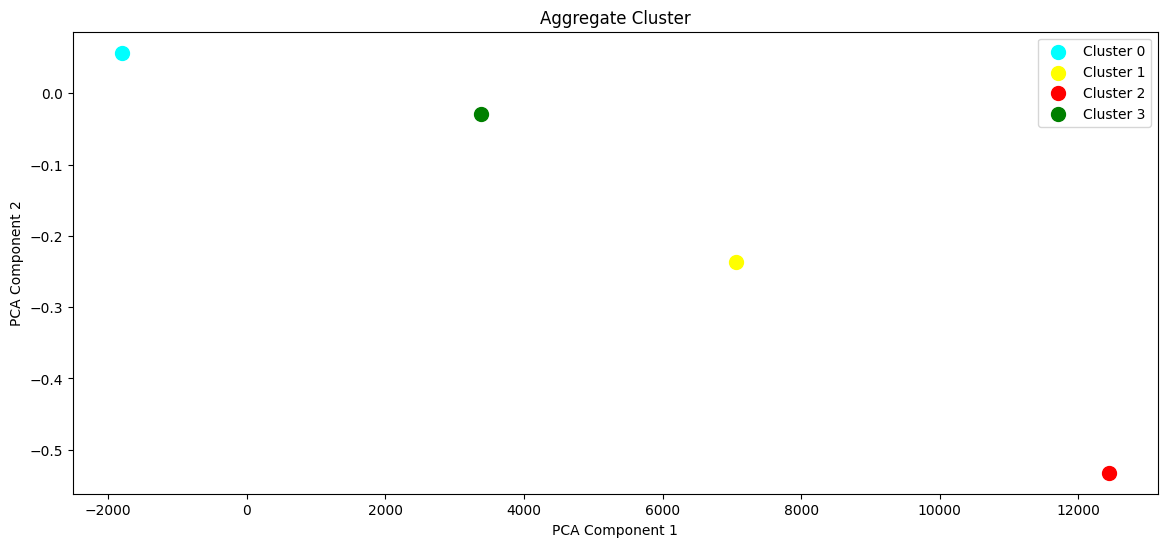

In [117]:
# Perform PCA for visualization
pca = PCA(n_components=2)
cluster_data_pca = pca.fit_transform(cluster_data)

# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=4, linkage='complete', metric='euclidean')
y_hc = hc.fit_predict(cluster_data)

# Calculate cluster centers (mean values)
cluster_centers = []
for cluster_label in range(4):
    cluster_center = np.mean(cluster_data_pca[y_hc == cluster_label], axis=0)
    cluster_centers.append(cluster_center)

# Plot the aggregate cluster
colors = ['cyan', 'yellow', 'red', 'green']
for cluster_label, color in zip(range(4), colors):
    plt.scatter(cluster_centers[cluster_label][0], cluster_centers[cluster_label][1], s=100, c=color, label=f'Cluster {cluster_label}')
    
# Plot the data points
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Aggregate Cluster')
plt.legend()
plt.show()

### 2. Hierarchy Cluster (KMeans)

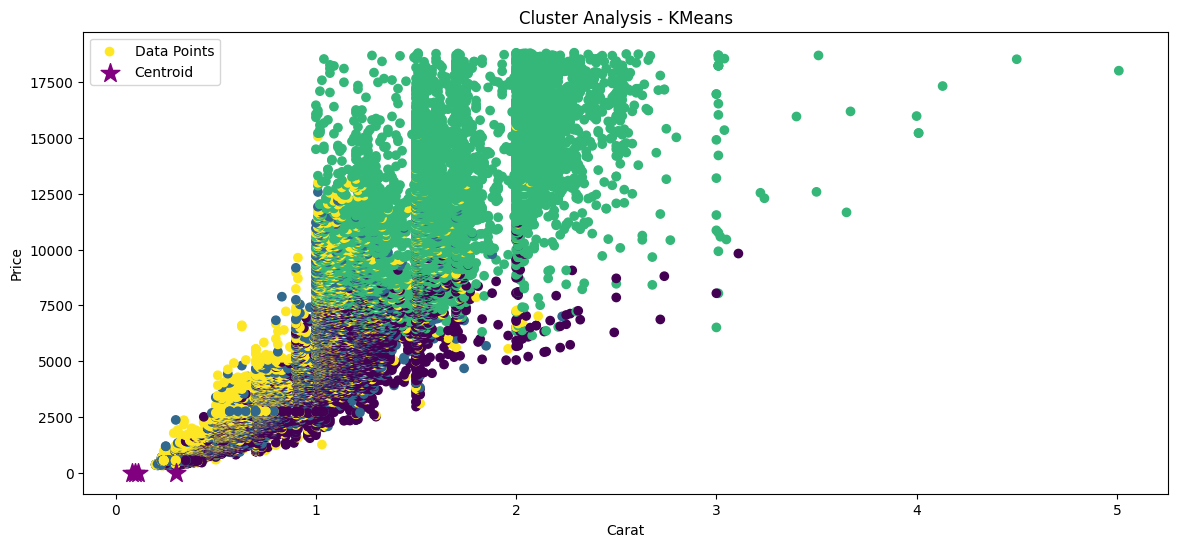

In [109]:
X = data[relevant_columns]

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering
km = KMeans(n_clusters=4, n_init='auto')
y_predicted = km.fit_predict(X_scaled)

# Assign cluster labels to data
data['cluster'] = y_predicted

# Plot clusters
plt.scatter(data.carat, data.price, c=data.cluster, cmap='viridis', label='Data Points')

# Plot centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,6], color='purple', marker='*', s=200, label='Centroid')

# Add labels and title``
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Cluster Analysis - KMeans')
plt.legend()
plt.show()


### 3. Hierarchy Cluster (DBScan)

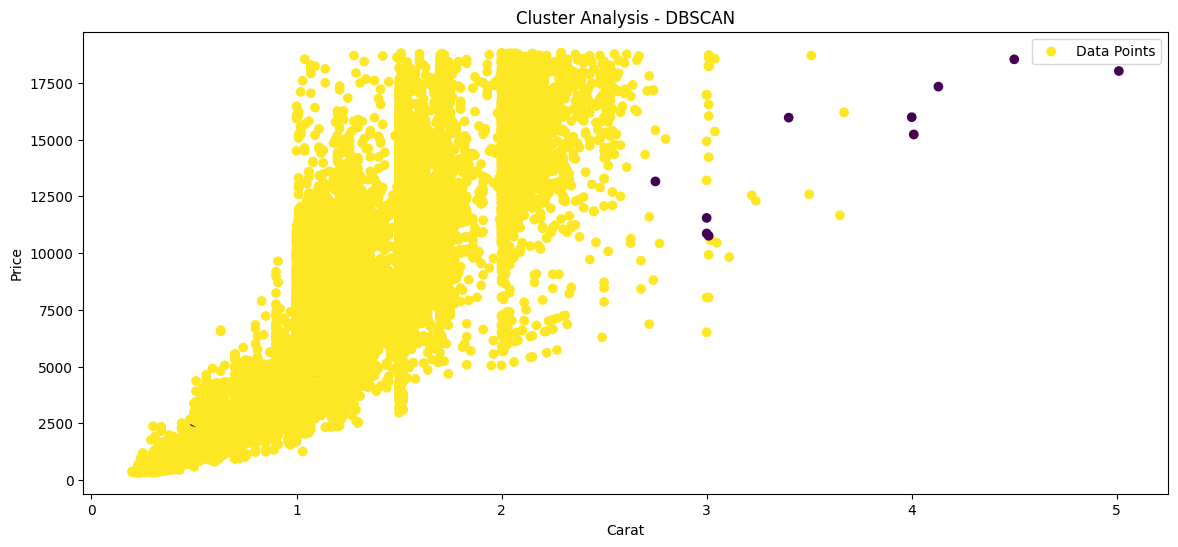

In [110]:
# Instantiate DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)

# Fit and predict clusters
y_predicted = dbscan.fit_predict(X_scaled)

# Assign cluster labels to data
data['cluster'] = y_predicted

# Plot clusters
plt.scatter(data.carat, data.price, c=data.cluster, cmap='viridis', label='Data Points')

# Add labels and title
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Cluster Analysis - DBSCAN')
plt.legend()
plt.show()


<center><h1><b> Indexing (Weighting and Aggregate) </b></h1></center>

### 1. Final composite index

In [111]:
# Select relevant columns
relevant_columns = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price']
cluster_data = data[relevant_columns]

# Drop any rows with missing values
cluster_data.dropna(inplace=True)

# Select only 1000 samples
cluster_data = cluster_data.sample(n=1000, random_state=42)

# Normalize the data
normalized_data = (cluster_data - cluster_data.min()) / (cluster_data.max() - cluster_data.min())

# Define weights for each column
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4])

# Calculate Sub-Indicators
sub_indicators = normalized_data * weights.reshape(1, -1)

# Aggregate Sub-Indicators
composite_index = sub_indicators.sum(axis=1)

# Add the composite index to the DataFrame
cluster_data['Composite_Index'] = composite_index

# Display the DataFrame with the composite index
print(tabulate(cluster_data.head(), headers='keys', tablefmt='pretty'))

+-------+-------+-----+-------+---------+-------+-------+---------+---------------------+
|       | carat | cut | color | clarity | depth | table |  price  |   Composite_Index   |
+-------+-------+-----+-------+---------+-------+-------+---------+---------------------+
| 34704 | 0.31  | 3.0 |  2.0  |   1.0   | 60.8  | 59.0  |  874.0  | 0.2166002351659861  |
| 21099 | 1.29  | 2.0 |  4.0  |   4.0   | 61.8  | 56.0  | 9273.0  | 0.4818093542319531  |
| 23685 | 1.52  | 3.0 |  2.0  |   2.0   | 62.6  | 59.0  | 11743.0 | 0.5224173076027099  |
| 39200 | 0.41  | 1.0 |  2.0  |   7.0   | 63.6  | 56.0  | 1064.0  | 0.26759909353818734 |
| 35560 | 0.35  | 3.0 |  3.0  |   4.0   | 61.5  | 58.0  |  906.0  | 0.2792748370794065  |
+-------+-------+-----+-------+---------+-------+-------+---------+---------------------+


C:\Users\User\AppData\Local\Temp\ipykernel_5140\3886510211.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data.dropna(inplace=True)


### 2. Top 10 Diamonds based on Composite Index

In [112]:
# Define the features and weights
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price']
weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4]  # Adjust weights according to importance

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data[features])

# Calculate the composite index
composite_index = np.dot(normalized_data, weights)

# Add the composite index to the DataFrame
data['Composite_Index'] = composite_index

# Sort the DataFrame by the composite index in descending order and select the top 10 diamonds
top_10_diamonds = data.sort_values(by='Composite_Index', ascending=False).head(10)

# Display the top 10 diamonds as a table
print(tabulate(top_10_diamonds[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'Composite_Index']],
               headers='keys', tablefmt='pretty', showindex=True))

+-------+-------+-----+-------+---------+-------+-------+---------+--------------------+
|       | carat | cut | color | clarity | depth | table |  price  |  Composite_Index   |
+-------+-------+-----+-------+---------+-------+-------+---------+--------------------+
| 27679 | 3.51  | 3.0 |  6.0  |   5.0   | 62.5  | 59.0  | 18701.0 | 0.7975411720147354 |
| 27586 | 2.44  | 4.0 |  6.0  |   5.0   | 58.1  | 60.0  | 18430.0 | 0.7841362946740846 |
| 27674 | 2.43  | 3.0 |  6.0  |   5.0   | 62.2  | 57.0  | 18692.0 | 0.770213836226433  |
| 27657 | 2.42  | 3.0 |  6.0  |   5.0   | 61.3  | 59.0  | 18615.0 | 0.7696869549779481 |
| 27639 | 2.38  | 3.0 |  6.0  |   5.0   | 62.1  | 58.0  | 18559.0 | 0.7679434922551374 |
| 26469 | 2.03  | 4.0 |  6.0  |   7.0   | 63.2  | 60.0  | 16043.0 | 0.7667312998993813 |
| 27352 | 2.39  | 4.0 |  6.0  |   4.0   | 59.6  | 60.0  | 17920.0 | 0.761948930531944  |
| 27335 | 2.16  | 3.0 |  6.0  |   6.0   | 61.5  | 58.0  | 17891.0 | 0.7615431495297149 |
| 27531 | 2.08  | 4.0

### 3. Visualization

<b> Visualisation of Distribution of Composite Index</b>

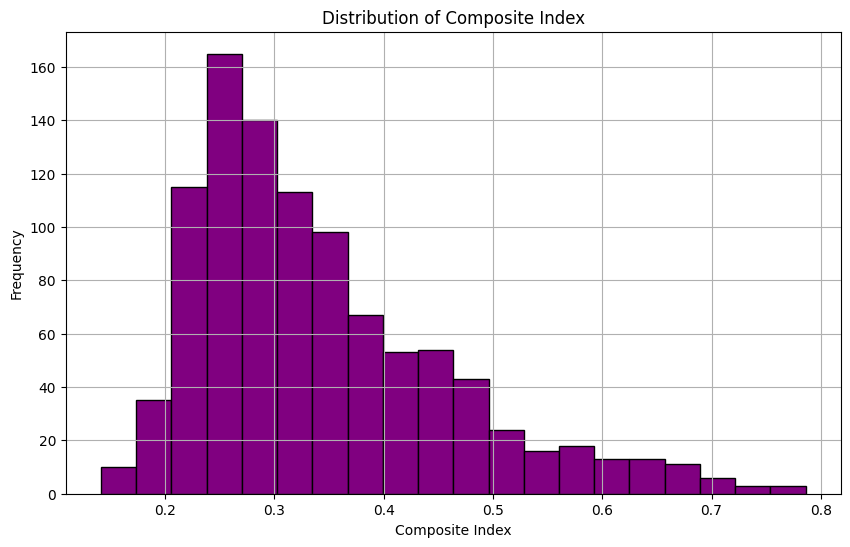

In [113]:
# Plot the final composite index
plt.figure(figsize=(10, 6))
plt.hist(cluster_data['Composite_Index'], bins=20, color=(0.5, 0, 0.5), edgecolor='black')
plt.xlabel('Composite Index')
plt.ylabel('Frequency')
plt.title('Distribution of Composite Index')
plt.grid(True)
plt.show()

<b>Visualisation of Composite Index for Diamonds</b>

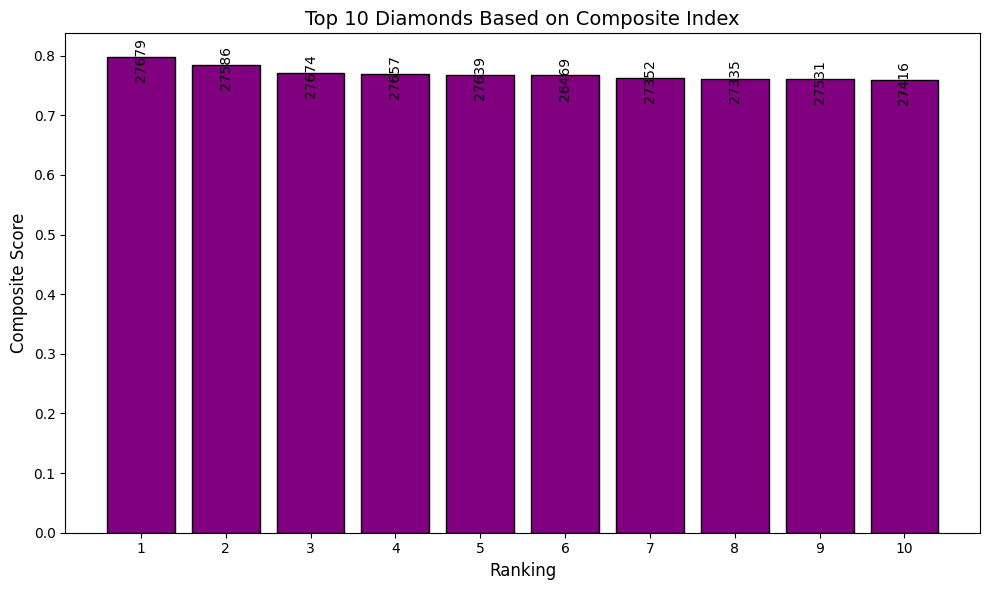

In [118]:
# Prepare data for visualization
top_10_diamonds = top_10_diamonds.sort_values(by='Composite_Index', ascending=False)  # Sort by descending index
diamonds_index = top_10_diamonds.index.tolist()
composite_indices = top_10_diamonds['Composite_Index'].tolist()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
bars = plt.bar(range(1, len(diamonds_index) + 1), composite_indices, color=(0.5, 0, 0.5), edgecolor='black')

# Add diamond names as labels inside the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.005, f'{diamonds_index[i]}', ha='center', va='center', rotation=90)

# Customize plot
plt.xlabel('Ranking', fontsize=12)
plt.ylabel('Composite Score', fontsize=12)
plt.title('Top 10 Diamonds Based on Composite Index', fontsize=14)
plt.xticks(range(1, len(diamonds_index) + 1), fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show plot
plt.show()


### Visualization of Composite Index and Sub-Indices

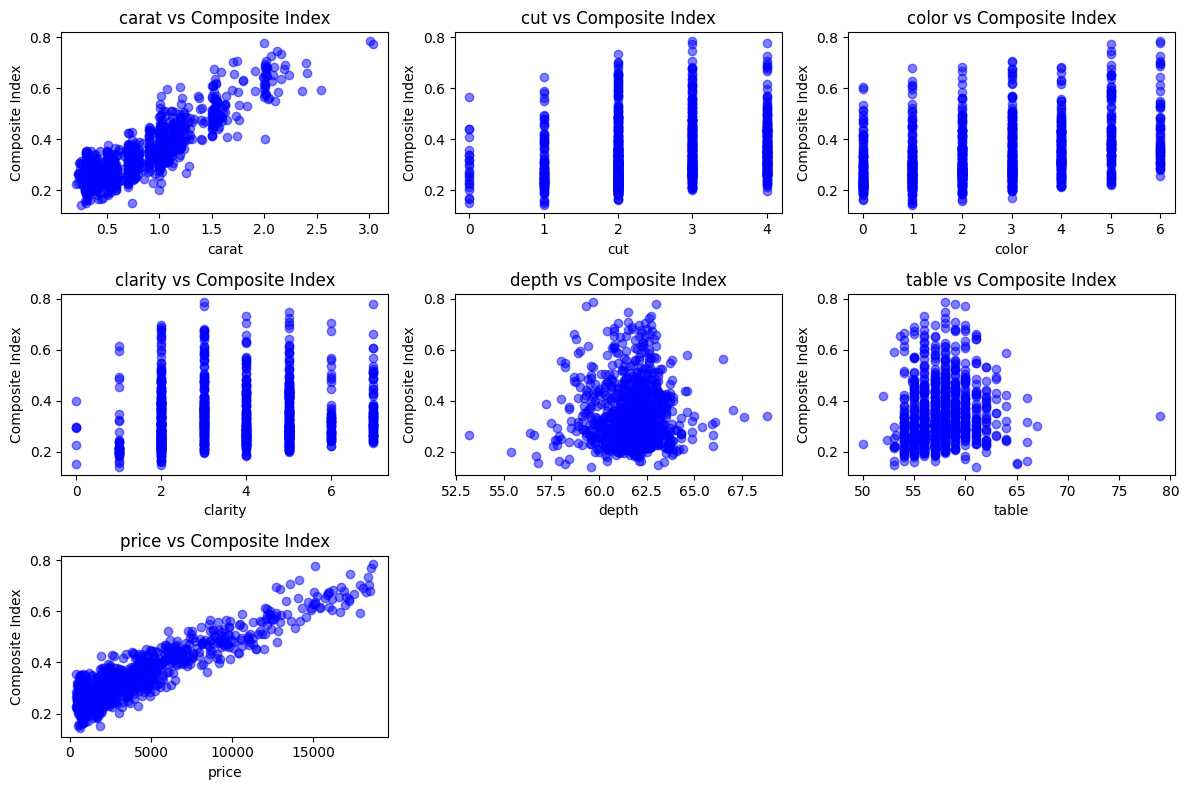

In [124]:
# Scatter plot of individual features against the composite index
plt.figure(figsize=(12, 8))
for i, feature in enumerate(relevant_columns):
    plt.subplot(3, 3, i + 1)
    plt.scatter(cluster_data[feature], cluster_data['Composite_Index'], color='blue', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Composite Index')
    plt.title(f'{feature} vs Composite Index')

plt.tight_layout()
plt.show()

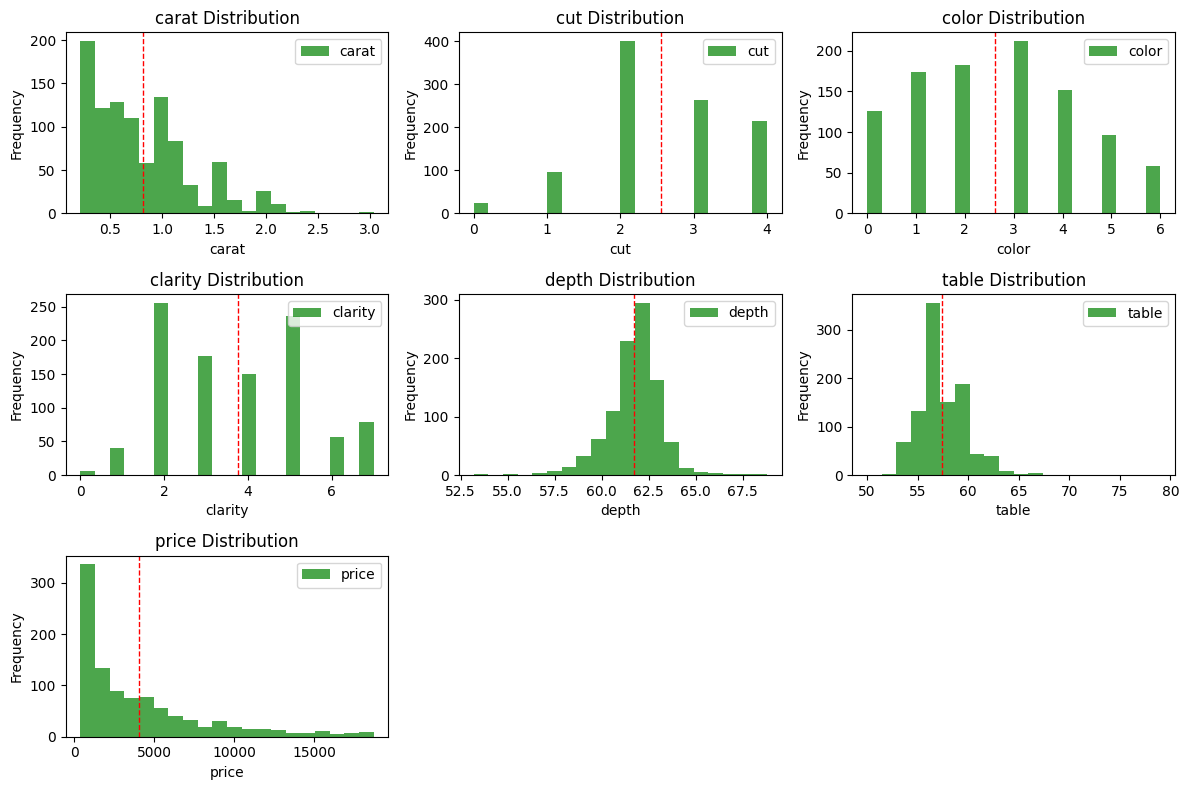

In [123]:
# Subplots of each feature's distribution along with the composite index
plt.figure(figsize=(12, 8))
for i, feature in enumerate(relevant_columns):
    plt.subplot(3, 3, i + 1)
    plt.hist(cluster_data[feature], bins=20, color='green', alpha=0.7, label=feature)
    plt.axvline(cluster_data[feature].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

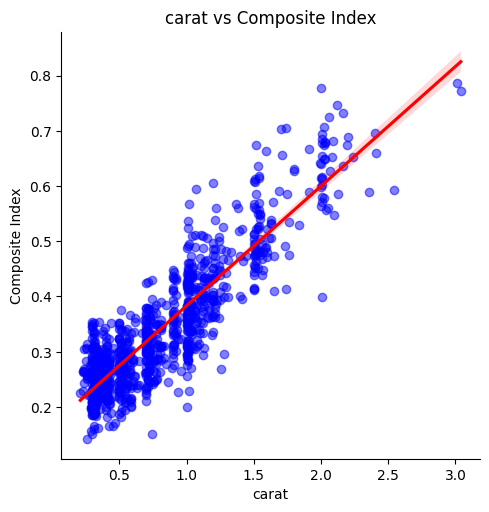

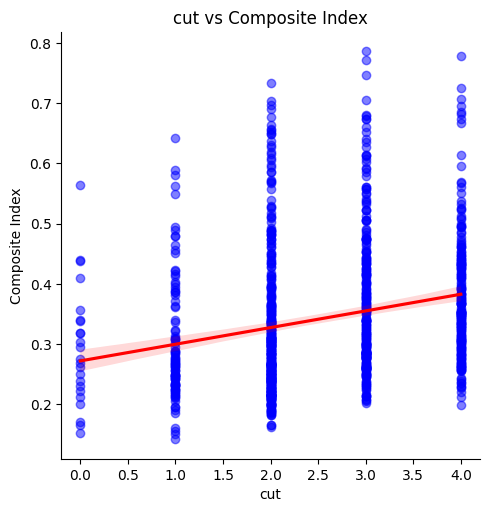

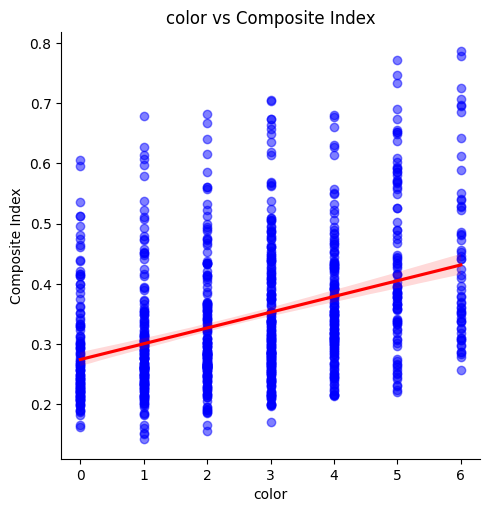

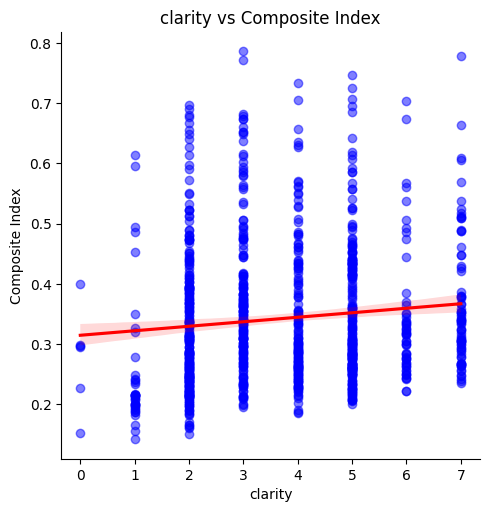

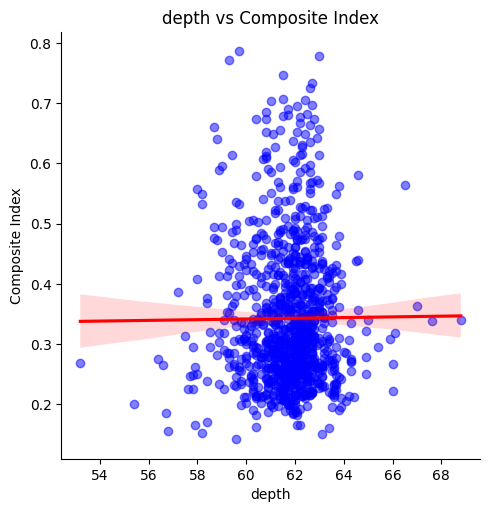

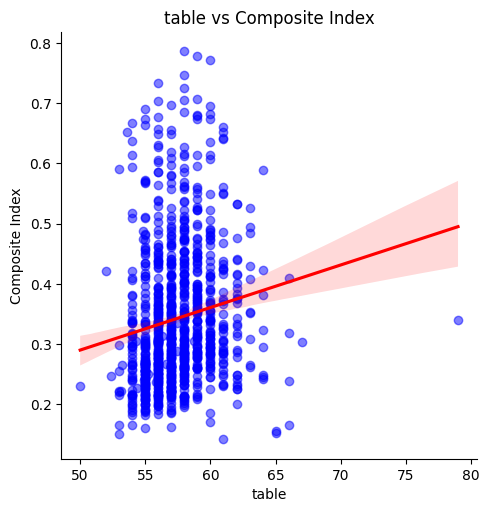

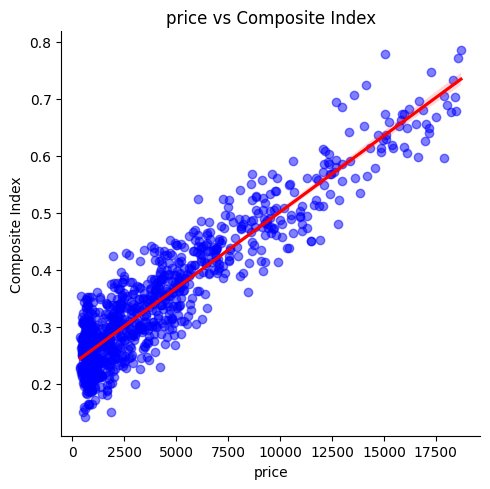

In [126]:
# Scatter plot of individual features against the composite index with regression line
plt.figure(figsize=(12, 8))
for i, feature in enumerate(relevant_columns):
    sns.lmplot(x=feature, y='Composite_Index', data=cluster_data, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'})
    plt.xlabel(feature)
    plt.ylabel('Composite Index')
    plt.title(f'{feature} vs Composite Index')

plt.tight_layout()
plt.show()